In [3]:
import pandas as pd

df = pd.read_csv("sample_data/test.csv", sep=',')
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
import pandas as pd

df1 = pd.read_csv("sample_data/train.csv", sep=',')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[0] = ligne
[1] = colonne

In [5]:
print (df.shape)
print (df1.shape)

(418, 11)
(891, 12)


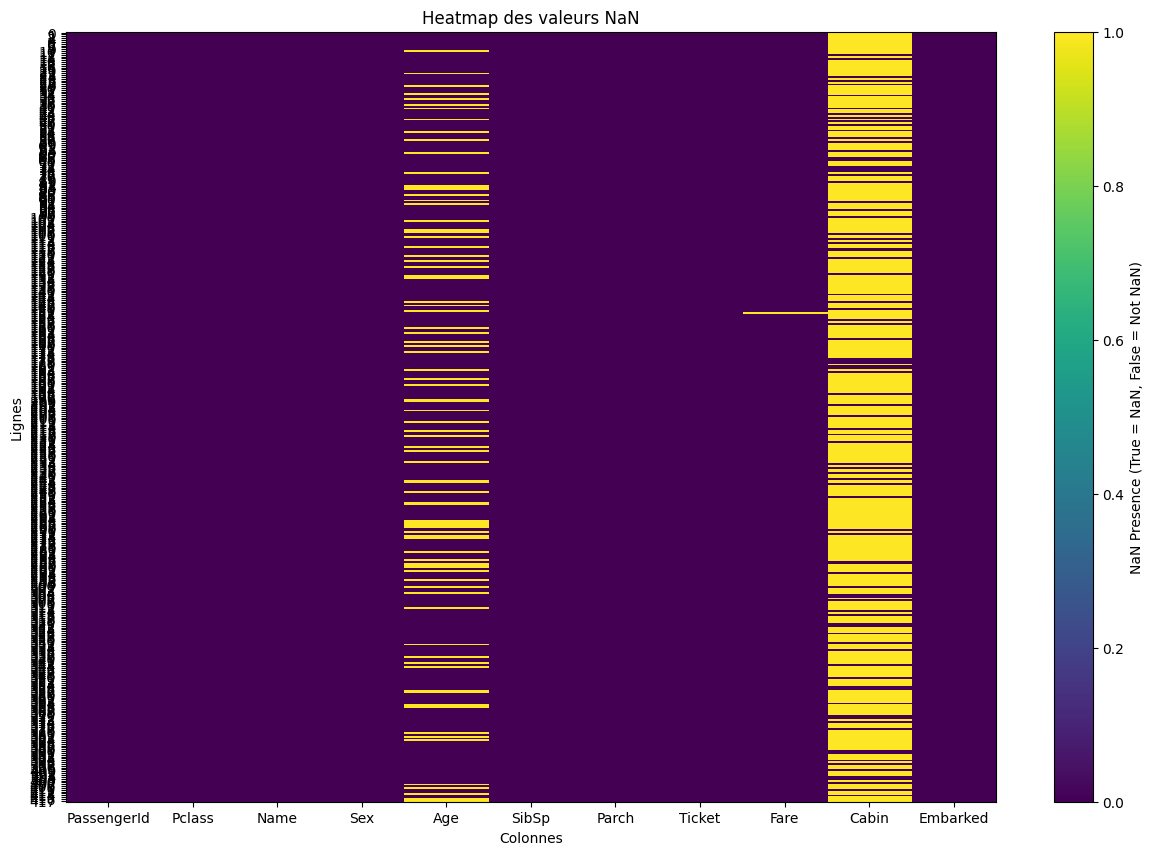

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


nan_map = df.isna()


plt.figure(figsize=(15, 10))
plt.imshow(nan_map, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label="NaN Presence (True = NaN, False = Not NaN)")
plt.title("Heatmap des valeurs NaN")
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.yticks(ticks=np.arange(len(df)), labels=df.index)

plt.show()

Isna transforme tableau avec des booléens

In [7]:

nb_nan = df['Age'].isna().sum()
size_df = len(df['Age'])

pourcent_nan = (nb_nan / size_df) * 100
print (pourcent_nan)


20.574162679425836


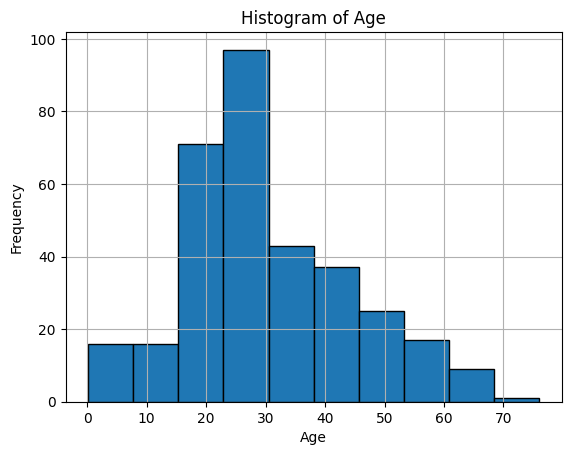

In [8]:
df['Age'].hist(bins=10, edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

In [9]:
print (df['Age'].mean())
print (df['Age'].median())

30.272590361445783
27.0


In [10]:
nb_nan = df['Cabin'].isna().sum()
size_df = len(df['Cabin'])

pourcent_nan = (nb_nan / size_df) * 100
print (pourcent_nan)

78.22966507177034


In [11]:
embarked_distribution = df['Embarked'].value_counts()
print (embarked_distribution)

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-12-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(common_embarked, inplace=True)

<ipython-input-13-7b518d93baa9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(common_embarked, inplace=True)


In [14]:
df.drop(columns=['Cabin'], inplace=True)

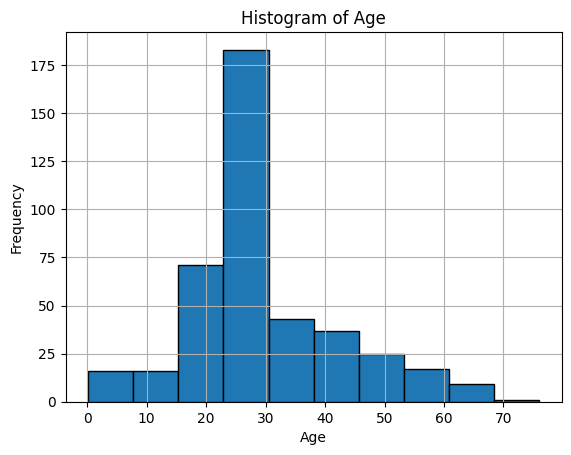

In [15]:
df['Age'].hist(bins=10, edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

In [16]:
df['TravelAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

In [17]:
df_encoded = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

In [18]:
df_encoded.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [19]:
null_values = df.isnull().sum()
print(null_values)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
TravelAlone    0
dtype: int64


In [20]:
df_train_copy = df1.copy()

In [22]:
print (df_train_copy)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [23]:
df_train_copy.drop(columns=['Cabin'], inplace=True)

In [24]:
df_train_copy['Age'].fillna(df_train_copy['Age'].median(), inplace=True)
df_train_copy['TravelAlone'] = ((df_train_copy['SibSp'] == 0) & (df_train_copy['Parch'] == 0)).astype(int)
df_encoded = pd.get_dummies(df_train_copy, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)
df_encoded.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

<ipython-input-24-e636df6857fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_copy['Age'].fillna(df_train_copy['Age'].median(), inplace=True)


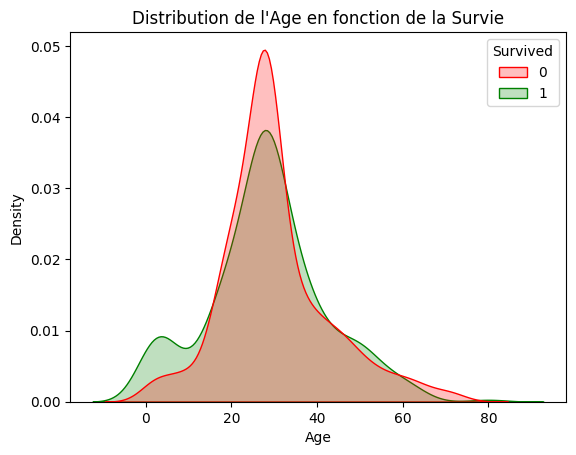

In [31]:
import seaborn as sns

sns.kdeplot(data=df_train_copy, x='Age', hue='Survived', fill=True, palette={0: 'red', 1: 'green'}, common_norm=False)

plt.title('Distribution de l\'Age en fonction de la Survie')
plt.xlabel('Age')

plt.show()

In [33]:
df_train_copy['IsMinor'] = df_train_copy['Age'] < 16
df_train_copy['IsMinor'] = df_train_copy['IsMinor'].astype(int)

<ipython-input-41-4d6ac3c42c0f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survivors_by_class.index, y=survivors_by_class.values, palette="viridis")


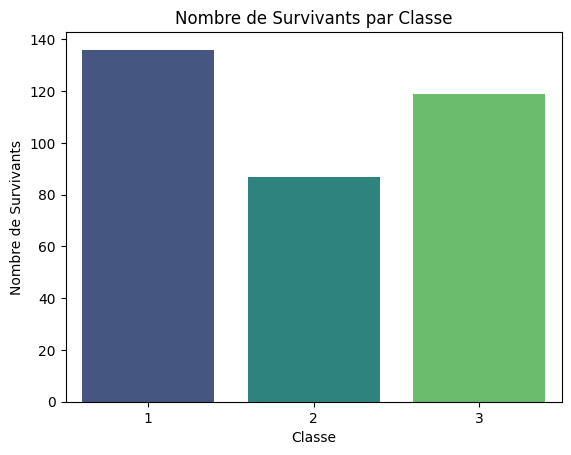

In [41]:
survivors_by_class = df_train_copy.groupby('Pclass')['Survived'].sum()
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=survivors_by_class.index, y=survivors_by_class.values, palette="viridis")

plt.title('Nombre de Survivants par Classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de Survivants')

plt.show()

<ipython-input-38-abde3bc7372c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_by_class.index,


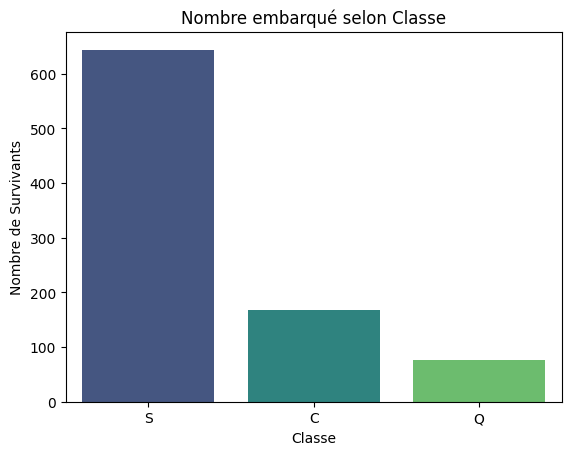

In [38]:

import seaborn as sns
import matplotlib.pyplot as plt

embarked_by_class = df_train_copy['Embarked'].value_counts()

sns.barplot(x=embarked_by_class.index,
            y=embarked_by_class.values,
            palette="viridis")


plt.title('Nombre embarqué selon Classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de Survivants')

plt.show()

<ipython-input-39-575818463117>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=travelAlone.index,


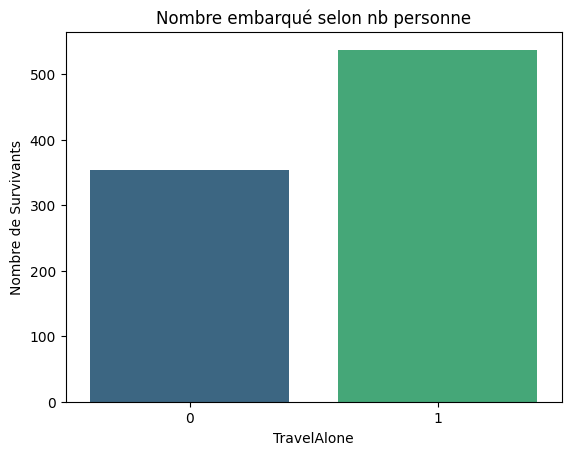

In [39]:

import seaborn as sns
import matplotlib.pyplot as plt

travelAlone = df_train_copy['TravelAlone'].value_counts()

sns.barplot(x=travelAlone.index,
            y=travelAlone.values,
            palette="viridis")


plt.title('Nombre embarqué selon nb personne')
plt.ylabel('Nombre de Survivants')

plt.show()

<ipython-input-42-18b679ebee10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender.index,


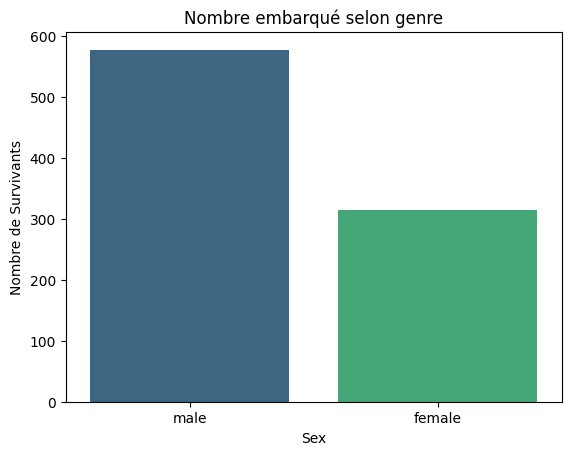

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

gender = df_train_copy['Sex'].value_counts()

sns.barplot(x=gender.index,
            y=gender.values,
            palette="viridis")


plt.title('Nombre embarqué selon genre')
plt.ylabel('Nombre de Survivants')

plt.show()